In [2]:
from gen_ai_web_server import llm_client
from sentence_transformers import SentenceTransformer
from sentence_transformers import util
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd

MAX_RUNS = 300
TEMPERATURE = [0, 0.1,0.3,0.5,1.0,1.5,2.0]

In [5]:


sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

client = llm_client.GeminiClient()

data = {}

text_db = {}

for t in TEMPERATURE:
    print("Temperature", t)
    for i in tqdm(range(MAX_RUNS)):
        if t > 0:
            response = client.send_request(prompt=[{"role":"user","content":"Hello, how are you?"}], run_config={"do_sample":True,"temperature":float(t)})
        else:
            response = client.send_request(prompt=[{"role":"user","content":"Hello, how are you?"}], run_config={"do_sample":False})
        
        text_response = client.extract_response(response)
        text_db.setdefault(t, []).append(text_response)
        data.setdefault(t, []).append(sentence_model.encode(text_response))

# text_db_df = pd.DataFrame(text_db)
# text_db_df.to_csv("text_db.csv")

Temperature 0


  1%|          | 2/300 [00:05<13:26,  2.71s/it]


KeyboardInterrupt: 

In [39]:


pd.DataFrame(data).to_csv("data.csv")

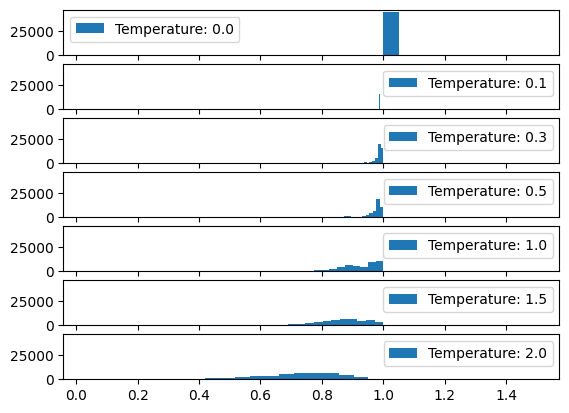

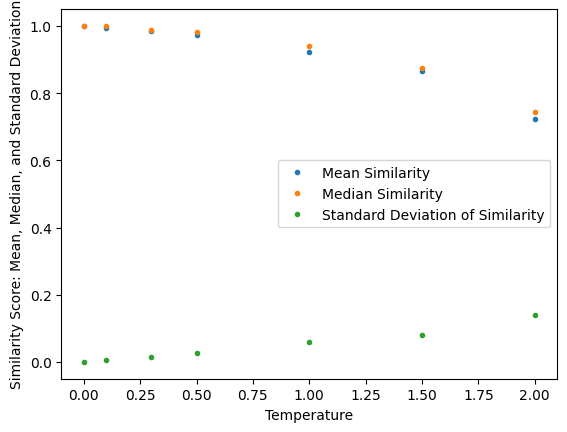

In [48]:

# data = pd.read_csv("data.csv")
# data = {k: data[k].values for k in data.columns[1:]}
# print(data)
data = pd.read_csv("dist_data.csv")

fig, ax = plt.subplots(len(data.keys())-1,1, sharex=True, sharey=True)
ax_count = 0
mean_v = []
median_v = []
std_v = []
for k in data.keys()[1:]:
    x = [float(i[7:-1]) for i in data[k]] 
    mean_v.append(np.mean(x))
    median_v.append(np.median(x))
    std_v.append(np.std(x))
    ax[ax_count].hist(x, bins=20, alpha=1, label=f"Temperature: {k}")
    ax[ax_count].legend()
    ax_count += 1

plt.show()

plt.plot(TEMPERATURE, mean_v, '.', label="Mean Similarity")
plt.plot(TEMPERATURE, median_v, '.', label="Median Similarity")
plt.plot(TEMPERATURE, std_v,'.', label="Standard Deviation of Similarity")
plt.xlabel("Temperature")
plt.ylabel("Similarity Score: Mean, Median, and Standard Deviation")
plt.legend()
plt.show()


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

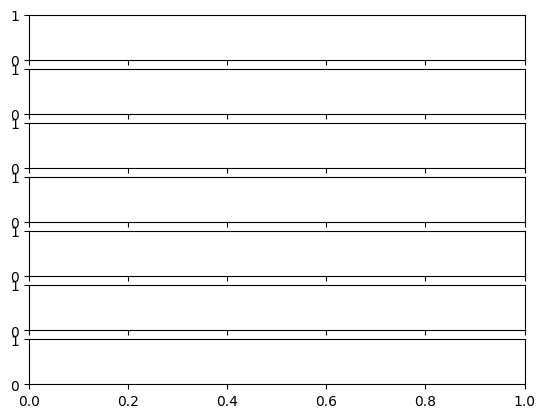

In [33]:
dist_data = {}
fig, ax = plt.subplots(len(TEMPERATURE),1, sharex=True, sharey=True)
ax_count = 0
for temp,run in data.items():
    items = len(run)
    dist  = []
    for i in range(items):
        for j in range(i+1, items):
            dist.append(util.dot_score(np.array(data[temp][i]), np.array(data[temp][j]))[0][0])
    dist_data[temp] = dist
    ax[ax_count].hist(dist, bins=30, alpha=1, label=f"Temperature: {temp}")
    ax[ax_count].legend()
    ax_count += 1
pd.DataFrame(dist_data).to_csv("dist_data.csv")

plt.show()